# ECG Heartbeat Classification 2D - ETL - Extract, Transform, Load
Preparation for analytics

### Original dataset:

* Electrocardiogram (ECG) is used to track the functionality of the cardiovascular system.
* This project focuses on accurately classifying five different rhythms. 
* The dataset is composed of two collections of heartbeat signals derived from two datasets in heartbeat classification, the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database.
* Dataset Link: https://www.kaggle.com/shayanfazeli/heartbeat?select=mitbih_train.csv

### Initial Data Exploration  
 
* Identify quality issues(e.g. missing values)
* Assess feature Quality - relevance of measurements
* Understand value distributions of the data using statistical meausures and visualizations
* Dataset transposed and saved to new csv file: data_ecg.csv

### ETL - Extract, Transform, Load  
 
* Dataset is sampled to 10,000
* ECG signal data points converted to images and saved to directory
* ECG images extracted and saved to csv file 
* Sampled and transfromed images joined with labels saved to: (ECG_imgs_sampled.csv) 

## Imports

In [2]:
# imports
import numpy as np
import pandas as pd
#!pip install pandas-profiling
#import pandas_profiling
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Download Data

In [7]:
data_ecg = pd.read_csv('data_ecg.csv')
data_ecg

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,label
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
data_ecg.shape

(87553, 188)

In [11]:
data_ecg.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
183      float64
184      float64
185      float64
186      float64
label    float64
Length: 188, dtype: object

In [12]:
data_ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 0 to label
dtypes: float64(188)
memory usage: 125.6 MB


# Sampling the dataset

In [13]:
# Sample the dataset
data_ecg_sample = data_ecg.sample(10000, random_state=1,axis=0).reset_index(drop=True)
#split_label = split_label.sample(100, random_state=1,axis=0).reset_index(drop=True)

print(data_ecg_sample.shape)

(10000, 188)


# Split labels form dataset

In [14]:
# Remove label column for plotting

split_df = data_ecg_sample.drop(['label'],axis=1).copy()
split_label = data_ecg_sample['label'].copy()

In [15]:
split_df.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.853261,0.394022,0.125000,0.089674,0.092391,0.081522,0.046196,0.038043,0.040761,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.938511,0.695793,0.051780,0.067961,0.100324,0.100324,0.087379,0.080906,0.087379,0.077670,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.124309,0.254144,0.383978,0.464088,0.574586,0.687845,0.745856,0.745856,0.756906,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.083810,0.000000,0.062857,0.236190,0.365714,0.438095,0.489524,0.514286,0.560000,0.622857,...,0.693333,0.695238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.926877,0.872530,0.806324,0.722332,0.604743,0.474308,0.373518,0.302372,0.243083,0.199605,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
split_label

0       0.0
1       0.0
2       0.0
3       2.0
4       4.0
       ... 
9995    0.0
9996    4.0
9997    0.0
9998    0.0
9999    0.0
Name: label, Length: 10000, dtype: float64

In [17]:
# Check the number of samples in each class
from collections import Counter
counter = Counter(split_label)
print(counter)

Counter({0.0: 8331, 4.0: 712, 2.0: 649, 1.0: 236, 3.0: 72})


# Transpose dataset for imaging

In [18]:
# Transpose the dataset to plot ecg across the features
# Axis 0 is now features and axis 1 is now samples ecg
split_df = split_df.T
split_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,0.938511,0.000000,0.083810,0.926877,1.000000,1.000000,1.000000,1.000000,0.946237,...,1.000000,1.000000,0.691743,0.950495,0.733945,1.000000,0.768139,0.990180,1.0000,0.962963
1,0.853261,0.695793,0.124309,0.000000,0.872530,0.845238,0.787535,0.908046,0.924479,0.561828,...,0.834586,0.574394,0.390826,0.892189,0.706422,0.725714,0.681388,0.911620,0.9488,0.862654
2,0.394022,0.051780,0.254144,0.062857,0.806324,0.535714,0.614731,0.593870,0.679688,0.408602,...,0.507519,0.020761,0.000000,0.827283,0.316514,0.477143,0.564669,0.504092,0.6944,0.283951
3,0.125000,0.067961,0.383978,0.236190,0.722332,0.182540,0.376771,0.111111,0.427083,0.263441,...,0.097744,0.096886,0.053211,0.764576,0.206422,0.317143,0.436909,0.142390,0.4800,0.000000
4,0.089674,0.100324,0.464088,0.365714,0.604743,0.134921,0.277620,0.000000,0.351562,0.166667,...,0.090226,0.103806,0.022018,0.672167,0.142202,0.185714,0.304416,0.170213,0.4912,0.219136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


# Transform ecg signal data points into images and save to file

In [19]:
# Converting ecg signal data points into images and saving to file
## For images of signals to use in 2dconv

import cv2
import sys
import os
import glob
import re

directory = './Desktop/ECG_imgs'

for count, i in enumerate(split_df):
    fig = plt.figure(frameon=True)
    plt.plot(split_df[i]) 
    plt.xticks([]), plt.yticks([])
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    filename = directory + '/' + str(count)+'.jpg' #.png
    fig.savefig(filename)
    im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    im_gray = cv2.resize(im_gray, (128, 128), interpolation = cv2.INTER_LANCZOS4)
    cv2.imwrite(filename, im_gray)
    plt.close()

# Create csv files for sampled labels and saved images

In [20]:
# Save Labels to csv
split_label.to_csv('split_label_ecg.csv', index=False)

In [21]:
# Sanity check
split_test_ecg = pd.read_csv('split_label_ecg.csv')
split_test_ecg

,label
0,0.0
1,0.0
2,0.0
3,2.0
4,4.0
...,...
9995,0.0
9996,4.0
9997,0.0
9998,0.0


# Save images to csv

In [22]:
# Save images to csv

import os
def ListofFiles(Dir):
    Files = []
    for root, dir_name, file_name in os.walk(Dir): 
#root store address till directory, dir_name stores directory name # file_name stores file name
        for name in file_name:
            fullName = os.path.join(root, name)
            Files.append(fullName)
    return Files

In [23]:
FileList = ListofFiles('C:/Users/celie/Desktop/ECG_imgs')

In [24]:
from PIL import Image
pixels=[]
for file in FileList:
    Im = Image.open(file)
    pixels.append(list(Im.getdata()))

In [25]:
import numpy as np
from numpy import savetxt
pixels_arr=np.asarray(pixels)
print(pixels_arr.shape)
savetxt('ECG_imgs.csv', pixels_arr, delimiter=',')

(10000, 16384)


In [26]:
# Sanity check
ECG = pd.read_csv("ECG_imgs.csv")
ECG

,2.550000000000000000e+02,2.550000000000000000e+02.1,2.550000000000000000e+02.2,2.550000000000000000e+02.3,2.550000000000000000e+02.4,2.550000000000000000e+02.5,2.550000000000000000e+02.6,2.550000000000000000e+02.7,2.550000000000000000e+02.8,2.550000000000000000e+02.9,...,2.550000000000000000e+02.15322,2.550000000000000000e+02.15323,2.550000000000000000e+02.15324,2.550000000000000000e+02.15325,2.550000000000000000e+02.15326,2.550000000000000000e+02.15327,2.550000000000000000e+02.15328,2.550000000000000000e+02.15329,2.550000000000000000e+02.15330,2.550000000000000000e+02.15331
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
9995,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
9996,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
9997,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


# Renumber the columns

In [27]:
# Renumber the columns for simplicity
for df in ECG: #data_ecg
    ECG.columns = list(range(len(ECG.columns)))

ECG.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


# Quick check of content

(10000, 16384)


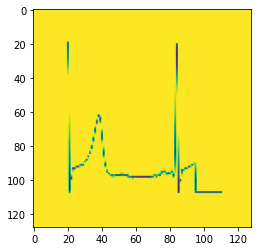

In [3]:
# Check content
from numpy import loadtxt
Image = loadtxt('ECG_imgs.csv', delimiter=',')
X=Image[3].reshape(128,128)
print(Image.shape)
plt.imshow(X)

# Combine labels and images to single dataset

In [25]:
ECG_joined = ECG.join(split_test_ecg)
ECG_joined

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,254.0,255.0,255.0,253.0,255.0,255.0,254.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
1,255.0,254.0,255.0,255.0,253.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
2,255.0,255.0,252.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2.0
4,253.0,255.0,255.0,255.0,255.0,254.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,255.0,255.0,252.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
9995,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
9996,255.0,251.0,255.0,255.0,255.0,255.0,253.0,255.0,255.0,252.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,4.0
9997,253.0,255.0,255.0,255.0,255.0,254.0,255.0,254.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0


# Save joined dataset to csv for future use

In [26]:
# Save to csv
ECG_joined.to_csv('ECG_imgs_sampled.csv', index=False)

In [27]:
# Sanity check
ECG_joined = pd.read_csv('ECG_imgs_sampled.csv')
ECG_joined.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,254.0,255.0,255.0,253.0,255.0,255.0,254.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
1,255.0,254.0,255.0,255.0,253.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
2,255.0,255.0,252.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2.0
4,253.0,255.0,255.0,255.0,255.0,254.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,4.0


# Check that images and labels plot from new dataset

In [28]:
# For class label mapping

class_label = {
    0: 'N - Normal',
    1: 'S - Atrial premature',
    2: 'V - Premature ventricular contraction',
    3: 'F - Fusion of ventricular and normal',
    4: 'Q - Paced Unclassifiable'
}

In [29]:
# Remove label column for plotting

ECG4 = ECG_joined.drop(['label'],axis=1).copy()
ECG4_label = ECG_joined['label'].copy()

In [30]:
ECG4

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,254.0,255.0,255.0,253.0,255.0,255.0,254.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,254.0,255.0,255.0,253.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,252.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,253.0,255.0,255.0,255.0,255.0,254.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,255.0,255.0,252.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
9995,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
9996,255.0,251.0,255.0,255.0,255.0,255.0,253.0,255.0,255.0,252.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
9997,253.0,255.0,255.0,255.0,255.0,254.0,255.0,254.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [31]:
ECG4_label

0       0.0
1       0.0
2       0.0
3       2.0
4       4.0
       ... 
9994    0.0
9995    0.0
9996    4.0
9997    0.0
9998    0.0
Name: label, Length: 9999, dtype: float64

In [37]:
# Split set for plotting
X = ECG4
y = ECG4_label

In [38]:
print(X.shape)
print(y.shape)

(9999, 784)
(9999,)


In [39]:
X = np.array(X)
print(X.shape)

(9999, 784)


In [40]:
X = X.reshape(-1, 28, 28, 1)
print(X.shape)

(9999, 28, 28, 1)


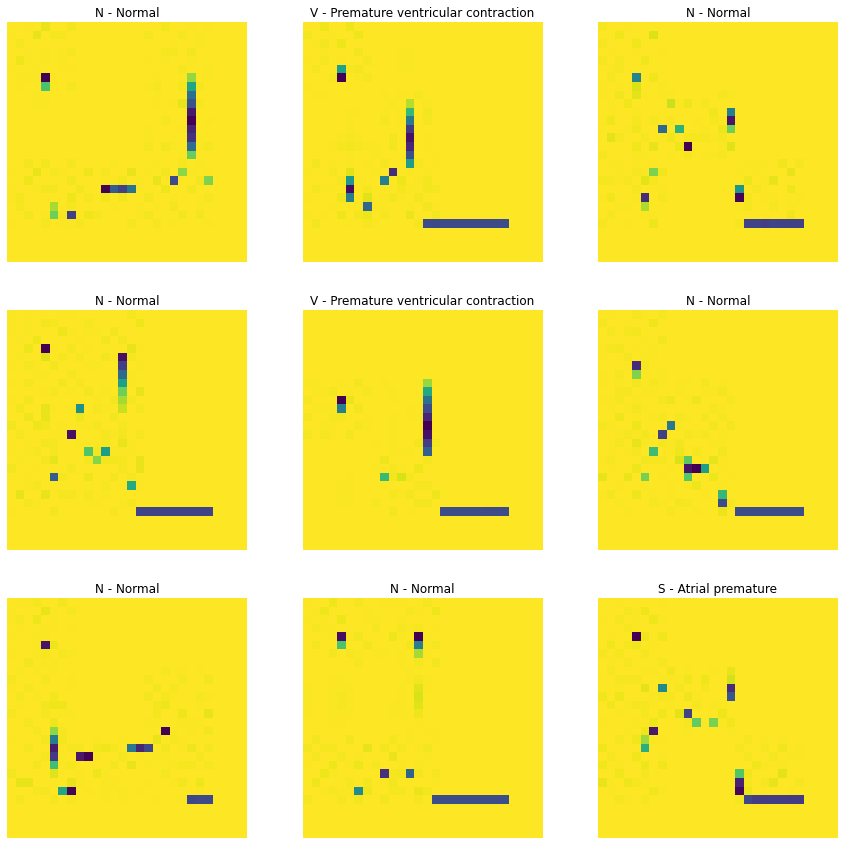

In [41]:
# Plot a few images

sample_data = pd.Series(list(zip(X, y))).sample(9)

sample_X = np.stack(np.array(sample_data.apply(lambda x: x[0])))
sample_y = np.array(sample_data.apply(lambda x: x[1]))

plt.figure(figsize=(15, 15))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(sample_X[i]))
    img_label = class_label[sample_y[i]]
    plt.title(img_label)
    plt.axis("off")

plt.show()

# Note:
#### (ECG_imgs_sampled.csv) is for prototyping - contains 10000, 128 x 128 ECG image samples and labels